<a href="https://colab.research.google.com/github/2series/test/blob/main/test_copy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [3]:
# Import PyDrive and associated libraries.
# This only needs to be done once per notebook.
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Download a file based on its file ID.
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
file_id = '12nRGXBL6u38sCET_x1OmLW6Hlthob-e_' # app_data_final.csv
downloaded = drive.CreateFile({'id': file_id})
print('Downloaded content "{}"'.format(downloaded.GetContentString()))

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [4]:
# The shareable link
link = 'https://drive.google.com/open?id=12nRGXBL6u38sCET_x1OmLW6Hlthob-e_'

In [5]:
# Verify everything after '='
fluff, id = link.split('=')
print (id) 

12nRGXBL6u38sCET_x1OmLW6Hlthob-e_


In [6]:
# Stored dataset in a Pandas Dataframe
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('app_data_final.csv')  
df = pd.read_csv('app_data_final.csv')
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,OWN_CAR_AGE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,HOUR_APPR_PROCESS_START,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,NaN,1,0,Laborers,1.0,2,10,Business Entity Type 3,0.083037,0.262949,0.139376,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,NaN,1,0,Core staff,2.0,1,11,School,0.311267,0.622246,NaN,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,26.0,1,0,Laborers,1.0,2,9,Government,NaN,0.555912,0.729567,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,NaN,0,0,Laborers,2.0,2,17,Business Entity Type 3,NaN,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,NaN,0,0,Core staff,1.0,2,11,Religion,NaN,0.322738,NaN,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'OWN_CAR_AGE',
       'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'HOUR_APPR_PROCESS_START', 'ORGANIZATION_TYPE',
       'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object')

In [8]:
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,OWN_CAR_AGE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,HOUR_APPR_PROCESS_START,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,104582.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,12.061091,0.281066,0.056720,2.152665,2.052463,12.063419,0.502130,5.143927e-01,0.510853,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,11.944812,0.449521,0.231307,0.910682,0.509034,3.265832,0.211062,1.910602e-01,0.194844,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.014568,8.170000e-08,0.000527,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,5.000000,0.000000,0.000000,2.000000,2.000000,10.000000,0.334007,3.924574e-01,0.370650,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,9.000000,0.000000,0.000000,2.000000,2.000000,12.000000,0.505998,5.659614e-01,0.535276,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,15.000000,1.000000,0.000000,3.000000,2.000000,14.000000,0.675053,6.636171e-01,0.669057,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,91.000000,1.000000,1.000000,20.000000,3.000000,23.000000,0.962693,8.549997e-01,0.896010,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [9]:
# Data types in dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 34 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   SK_ID_CURR                  307511 non-null  int64  
 1   TARGET                      307511 non-null  int64  
 2   NAME_CONTRACT_TYPE          307511 non-null  object 
 3   CODE_GENDER                 307511 non-null  object 
 4   FLAG_OWN_CAR                307511 non-null  object 
 5   FLAG_OWN_REALTY             307511 non-null  object 
 6   CNT_CHILDREN                307511 non-null  int64  
 7   AMT_INCOME_TOTAL            307511 non-null  float64
 8   AMT_CREDIT                  307511 non-null  float64
 9   AMT_ANNUITY                 307499 non-null  float64
 10  AMT_GOODS_PRICE             307233 non-null  float64
 11  NAME_TYPE_SUITE             306219 non-null  object 
 12  NAME_INCOME_TYPE            307511 non-null  object 
 13  NAME_EDUCATION

In [10]:
# Check for missing values in columns
df.isnull().any()

SK_ID_CURR                    False
TARGET                        False
NAME_CONTRACT_TYPE            False
CODE_GENDER                   False
FLAG_OWN_CAR                  False
FLAG_OWN_REALTY               False
CNT_CHILDREN                  False
AMT_INCOME_TOTAL              False
AMT_CREDIT                    False
AMT_ANNUITY                    True
AMT_GOODS_PRICE                True
NAME_TYPE_SUITE                True
NAME_INCOME_TYPE              False
NAME_EDUCATION_TYPE           False
NAME_FAMILY_STATUS            False
NAME_HOUSING_TYPE             False
REGION_POPULATION_RELATIVE    False
OWN_CAR_AGE                    True
FLAG_PHONE                    False
FLAG_EMAIL                    False
OCCUPATION_TYPE                True
CNT_FAM_MEMBERS                True
REGION_RATING_CLIENT          False
HOUR_APPR_PROCESS_START       False
ORGANIZATION_TYPE             False
EXT_SOURCE_1                   True
EXT_SOURCE_2                   True
EXT_SOURCE_3                

In [11]:
# Quantify number of missing values
df.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
OWN_CAR_AGE                   202929
FLAG_PHONE                         0
FLAG_EMAIL                         0
OCCUPATION_TYPE                96391
CNT_FAM_MEMBERS                    2
REGION_RATING_CLIENT               0
HOUR_APPR_PROCESS_START            0
ORGANIZATION_TYPE                  0
EXT_SOURCE_1                  173378
EXT_SOURCE_2                     660
E

In [12]:
# Check percentage of missing values in columns 
missing_values = ((df.isna().sum()) / len(df.index)).sort_values(ascending=False)
missing_values = missing_values[missing_values > 0]
print(missing_values*100)

OWN_CAR_AGE                   65.990810
EXT_SOURCE_1                  56.381073
OCCUPATION_TYPE               31.345545
EXT_SOURCE_3                  19.825307
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_HOUR    13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
NAME_TYPE_SUITE                0.420148
EXT_SOURCE_2                   0.214626
AMT_GOODS_PRICE                0.090403
AMT_ANNUITY                    0.003902
CNT_FAM_MEMBERS                0.000650
dtype: float64


In [13]:
# Drop columns where NaN is more than 30%
df.drop(missing_values[missing_values > 0.3].index, axis=1, inplace=True)

In [14]:
# Drop rows where NaN is more than 30
df.dropna(axis=0, thresh=30, inplace=True)

In [15]:
df.shape

(265579, 31)

In [16]:
# Quantify number of missing values
df.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
FLAG_OWN_REALTY                   0
CNT_CHILDREN                      0
AMT_INCOME_TOTAL                  0
AMT_CREDIT                        0
AMT_ANNUITY                      11
AMT_GOODS_PRICE                   0
NAME_TYPE_SUITE                 868
NAME_INCOME_TYPE                  0
NAME_EDUCATION_TYPE               0
NAME_FAMILY_STATUS                0
NAME_HOUSING_TYPE                 0
REGION_POPULATION_RELATIVE        0
FLAG_PHONE                        0
FLAG_EMAIL                        0
CNT_FAM_MEMBERS                   0
REGION_RATING_CLIENT              0
HOUR_APPR_PROCESS_START           0
ORGANIZATION_TYPE                 0
EXT_SOURCE_2                    430
EXT_SOURCE_3                  19243
AMT_REQ_CREDIT_BUREAU_HOUR        0
AMT_REQ_CREDIT_BUREAU_DAY         0
AMT_REQ_CREDIT_BUREAU_WEEK  

In [17]:
# Check columns unique values
unique_val = df.apply(lambda x: len(pd.unique(x)), axis=0).sort_values(ascending=False)
unique_val

SK_ID_CURR                    265579
EXT_SOURCE_2                  111938
AMT_ANNUITY                    13193
AMT_CREDIT                      5265
AMT_INCOME_TOTAL                2182
AMT_GOODS_PRICE                  840
EXT_SOURCE_3                     815
REGION_POPULATION_RELATIVE        81
ORGANIZATION_TYPE                 58
AMT_REQ_CREDIT_BUREAU_YEAR        25
AMT_REQ_CREDIT_BUREAU_MON         24
HOUR_APPR_PROCESS_START           24
CNT_FAM_MEMBERS                   17
CNT_CHILDREN                      15
AMT_REQ_CREDIT_BUREAU_QRT         11
AMT_REQ_CREDIT_BUREAU_WEEK         9
AMT_REQ_CREDIT_BUREAU_DAY          9
NAME_INCOME_TYPE                   8
NAME_TYPE_SUITE                    8
NAME_HOUSING_TYPE                  6
AMT_REQ_CREDIT_BUREAU_HOUR         5
NAME_EDUCATION_TYPE                5
NAME_FAMILY_STATUS                 5
CODE_GENDER                        3
REGION_RATING_CLIENT               3
FLAG_PHONE                         2
FLAG_EMAIL                         2
F

In [18]:
#Lets sample the count for columns having only unique values
def column_analyse(x, df=df): 
    print(df[x].value_counts(), "\n", df[x].value_counts()/len(df[x]))

column_analyse("TARGET") 
column_analyse("NAME_CONTRACT_TYPE")
column_analyse("FLAG_OWN_REALTY")
column_analyse("FLAG_EMAIL")
column_analyse("REGION_RATING_CLIENT")
column_analyse("CODE_GENDER")
column_analyse("NAME_FAMILY_STATUS")
column_analyse("NAME_EDUCATION_TYPE")
column_analyse("NAME_HOUSING_TYPE")
column_analyse("NAME_TYPE_SUITE")
column_analyse("NAME_INCOME_TYPE")

0    245070
1     20509
Name: TARGET, dtype: int64 
 0    0.922776
1    0.077224
Name: TARGET, dtype: float64
Cash loans         240825
Revolving loans     24754
Name: NAME_CONTRACT_TYPE, dtype: int64 
 Cash loans         0.906792
Revolving loans    0.093208
Name: NAME_CONTRACT_TYPE, dtype: float64
Y    183333
N     82246
Name: FLAG_OWN_REALTY, dtype: int64 
 Y    0.690314
N    0.309686
Name: FLAG_OWN_REALTY, dtype: float64
0    250240
1     15339
Name: FLAG_EMAIL, dtype: int64 
 0    0.942243
1    0.057757
Name: FLAG_EMAIL, dtype: float64
2    197021
3     41366
1     27192
Name: REGION_RATING_CLIENT, dtype: int64 
 2    0.741855
3    0.155758
1    0.102388
Name: REGION_RATING_CLIENT, dtype: float64
F      175964
M       89611
XNA         4
Name: CODE_GENDER, dtype: int64 
 F      0.662567
M      0.337417
XNA    0.000015
Name: CODE_GENDER, dtype: float64
Married                 171895
Single / not married     37541
Civil marriage           24933
Separated                17322
Widow   

### Observation

* We will remove SK_ID_CURR as it is 100% unique
* TARGET, NAME_CONTRACT_TYPE and FLAG_EMAIL are highly imbalanced, more than 90%
* EXT_SOURCE_2, EXT_SOURCE_3, ORGANIZATION_TYPE are too detailed for analysis



In [19]:
delete_cols = ["SK_ID_CURR", "NAME_CONTRACT_TYPE", "FLAG_EMAIL", "FLAG_PHONE", "EXT_SOURCE_2", "EXT_SOURCE_3", "ORGANIZATION_TYPE"]
df.drop(delete_cols, axis=1, inplace=True)
df_new = df

In [20]:
df_new.shape

(265579, 24)

In [21]:
df_new.columns

Index(['TARGET', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'HOUR_APPR_PROCESS_START', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object')

# Up to here happy



In [22]:
#!pip install dtale

In [23]:
#dtale.show()

# Using  Pycaret library

In [ ]:
!pip install pycaret

# Classification task

In [25]:
from pycaret.classification import *

## This function initializes the training environment and creates the transformation pipeline

In [26]:
exp_name = setup(data=df_new,  target='TARGET', 
                 session_id=123,
                 normalize=True, 
                 transformation=True,
                 pca=False,
                 #pca_method='linear', 
                 ignore_low_variance=True,
                 bin_numeric_features=['AMT_INCOME_TOTAL'],
                 #bin_numeric_features=['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
                 #                      'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
                 #                      'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR'],
                 remove_outliers=True,
                 remove_multicollinearity=True,
                 feature_selection=True,
                 feature_interaction=True,
                 fix_imbalance=True,
                 fold=5,
                 profile=True
                 ) 

,Description,Value
0,session_id,123
1,Target,TARGET
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(265579, 24)"
5,Missing Values,True
6,Numeric Features,13
7,Categorical Features,10
8,Ordinal Features,False
9,High Cardinality Features,False


# Compare all models

## This function trains and evaluates performance of all estimators available in the model library using cross validation. The output of this function is a score grid with average cross validated scores

In [27]:
top3 = compare_models(n_select=3, sort='AUC')

# using stratified cv with 5-fold, scoring metric set as AUC
#compare_models(fold=5, sort='AUC')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9227,0.6469,0.0000,0.0000,0.0000,-0.0000,-0.0003,32.916
catboost,CatBoost Classifier,0.9226,0.6437,0.0006,0.3483,0.0012,0.0009,0.0112,191.342
xgboost,Extreme Gradient Boosting,0.9226,0.6394,0.0006,0.1921,0.0012,0.0008,0.0069,183.614
lda,Linear Discriminant Analysis,0.5924,0.6294,0.5920,0.1085,0.1834,0.0607,0.0998,29.874
lr,Logistic Regression,0.5943,0.6293,0.5877,0.1084,0.1830,0.0603,0.0988,38.368
gbc,Gradient Boosting Classifier,0.9223,0.6117,0.0016,0.1957,0.0032,0.0019,0.0111,337.022
rf,Random Forest Classifier,0.9218,0.5996,0.0039,0.2060,0.0076,0.0047,0.0182,139.386
nb,Naive Bayes,0.5450,0.5967,0.5985,0.0984,0.1691,0.0418,0.0744,23.326
ada,Ada Boost Classifier,0.9158,0.5960,0.0195,0.1261,0.0324,0.0164,0.0248,81.854
et,Extra Trees Classifier,0.9203,0.5954,0.0077,0.1682,0.0147,0.0080,0.0202,114.796


In [28]:
print(top3)

[LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0), <catboost.core.CatBoostClassifier object at 0x7fb5a182b438>, XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=-1, num_parallel_tree=1,
              objective='binary:logistic', random_state=123,

# Create a model

## This function trains and evaluates the performance of a given estimator using cross validation. The output of this function is a score grid with CV scores by fold

In [30]:
# Chosen based on AUC score
lightgbm = create_model('lightgbm', fold=5, round=2)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.92,0.64,0.0,0.0,0.0,0.0,0.0
1,0.92,0.65,0.0,0.0,0.0,0.0,0.0
2,0.92,0.65,0.0,0.0,0.0,0.0,0.0
3,0.92,0.65,0.0,0.0,0.0,-0.0,-0.0
4,0.92,0.64,0.0,0.0,0.0,0.0,0.0
Mean,0.92,0.65,0.0,0.0,0.0,-0.0,-0.0
SD,0.00,0.00,0.0,0.0,0.0,0.0,0.0


In [31]:
# Chosen based on AUC score
catboost = create_model('catboost', fold=5, round=2)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.92,0.64,0.0,0.50,0.0,0.0,0.02
1,0.92,0.65,0.0,0.12,0.0,0.0,0.00
2,0.92,0.64,0.0,0.75,0.0,0.0,0.03
3,0.92,0.65,0.0,0.20,0.0,0.0,0.01
4,0.92,0.64,0.0,0.17,0.0,0.0,0.00
Mean,0.92,0.64,0.0,0.35,0.0,0.0,0.01
SD,0.00,0.00,0.0,0.24,0.0,0.0,0.01


# Tune model

## This function tunes the hyperparameters of a given estimator. The output of this function is a score grid with CV scores by fold of the best selected model based on optimize parameter

In [35]:
# tune hyperparameters of Random Forest and score it using stratified cv
tune_lightgbm = tune_model(lightgbm, optimize='AUC')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9225,0.6389,0.0011,0.3000,0.0022,0.0016,0.0140
1,0.9225,0.6398,0.0007,0.2222,0.0015,0.0010,0.0087
2,0.9225,0.6410,0.0022,0.3750,0.0044,0.0035,0.0237
3,0.9225,0.6462,0.0004,0.1111,0.0007,0.0002,0.0020
4,0.9225,0.6431,0.0000,0.0000,0.0000,-0.0003,-0.0034
Mean,0.9225,0.6418,0.0009,0.2017,0.0017,0.0012,0.0090
SD,0.0000,0.0026,0.0008,0.1334,0.0015,0.0013,0.0094


## Observation of AUC score before & after hyperparameter
### Metric Result - AUC - 

+ Light Gradient Boosting Machine

 (Before: 0.65, After: 0.64)

In [ ]:
# tune hyperparameters of Random Forest and score it using stratified cv
#tuned_catboost = tune_model(catboost, optimize='AUC')

## Observation of AUC score before & after hyperparameter
### Metric Result - AUC - 

+ CatBoost Classifier (Before: 0.64, After: 0.?)

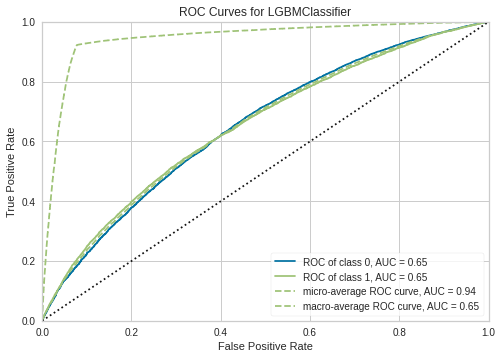

In [38]:
# Analyse the performance of trained model on holdout set
plot_model(lightgbm, plot='auc')

In [39]:
evaluate_model(lightgbm)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [ ]:
!pip install shap

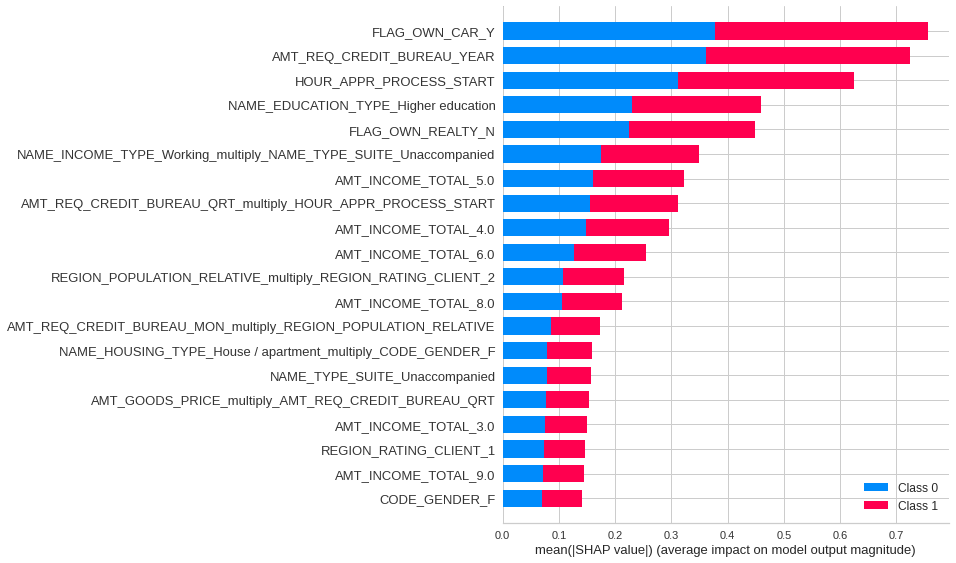

In [42]:
# Analyse the predictions generated from our model
interpret_model(lightgbm)

In [44]:
# UI for plots for our lightgbm
evaluate_model(lightgbm)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [45]:
predict_model(lightgbm)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9224,0.6532,0.0,0.0,0.0,-0.0,-0.001


,NAME_TYPE_SUITE_Spouse partner,REGION_RATING_CLIENT_3,NAME_INCOME_TYPE_State servant,AMT_REQ_CREDIT_BUREAU_QRT,NAME_INCOME_TYPE_Pensioner,AMT_INCOME_TOTAL_7.0,AMT_INCOME_TOTAL_1.0,REGION_RATING_CLIENT_1,FLAG_OWN_CAR_Y,NAME_FAMILY_STATUS_Civil marriage,NAME_TYPE_SUITE_Family,NAME_FAMILY_STATUS_Single / not married,AMT_INCOME_TOTAL_5.0,NAME_INCOME_TYPE_Commercial associate,CNT_CHILDREN_2,AMT_REQ_CREDIT_BUREAU_MON,NAME_FAMILY_STATUS_Separated,HOUR_APPR_PROCESS_START,AMT_INCOME_TOTAL_8.0,CNT_CHILDREN_0,AMT_INCOME_TOTAL_10.0,NAME_FAMILY_STATUS_Widow,NAME_EDUCATION_TYPE_Lower secondary,CNT_FAM_MEMBERS,NAME_HOUSING_TYPE_Rented apartment,CODE_GENDER_F,NAME_HOUSING_TYPE_With parents,NAME_HOUSING_TYPE_Municipal apartment,AMT_ANNUITY,CNT_CHILDREN_1,NAME_HOUSING_TYPE_House / apartment,AMT_GOODS_PRICE,AMT_INCOME_TOTAL_4.0,NAME_TYPE_SUITE_Unaccompanied,NAME_FAMILY_STATUS_Married,NAME_EDUCATION_TYPE_Incomplete higher,FLAG_OWN_REALTY_N,CNT_CHILDREN_3,AMT_REQ_CREDIT_BUREAU_YEAR,NAME_INCOME_TYPE_Working,...,AMT_GOODS_PRICE_multiply_AMT_REQ_CREDIT_BUREAU_QRT,AMT_GOODS_PRICE_multiply_CNT_CHILDREN_0,AMT_ANNUITY_multiply_AMT_REQ_CREDIT_BUREAU_QRT,HOUR_APPR_PROCESS_START_multiply_AMT_GOODS_PRICE,NAME_EDUCATION_TYPE_Higher education_multiply_CODE_GENDER_F,CNT_FAM_MEMBERS_multiply_FLAG_OWN_REALTY_N,AMT_ANNUITY_multiply_AMT_INCOME_TOTAL_7.0,REGION_POPULATION_RELATIVE_multiply_AMT_REQ_CREDIT_BUREAU_MON,AMT_ANNUITY_multiply_CODE_GENDER_F,NAME_INCOME_TYPE_Working_multiply_AMT_ANNUITY,CNT_CHILDREN_1_multiply_AMT_GOODS_PRICE,NAME_EDUCATION_TYPE_Higher education_multiply_NAME_HOUSING_TYPE_House / apartment,NAME_INCOME_TYPE_Working_multiply_NAME_TYPE_SUITE_Unaccompanied,CODE_GENDER_F_multiply_NAME_INCOME_TYPE_Pensioner,AMT_GOODS_PRICE_multiply_NAME_HOUSING_TYPE_House / apartment,AMT_GOODS_PRICE_multiply_AMT_ANNUITY,HOUR_APPR_PROCESS_START_multiply_CNT_FAM_MEMBERS,NAME_FAMILY_STATUS_Married_multiply_AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START_multiply_AMT_INCOME_TOTAL_8.0,AMT_REQ_CREDIT_BUREAU_YEAR_multiply_AMT_GOODS_PRICE,NAME_FAMILY_STATUS_Married_multiply_AMT_ANNUITY,AMT_REQ_CREDIT_BUREAU_MON_multiply_AMT_GOODS_PRICE,CODE_GENDER_F_multiply_CNT_CHILDREN_0,CNT_CHILDREN_0_multiply_HOUR_APPR_PROCESS_START,NAME_INCOME_TYPE_Working_multiply_AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE_multiply_AMT_REQ_CREDIT_BUREAU_YEAR,REGION_POPULATION_RELATIVE_multiply_AMT_GOODS_PRICE,NAME_FAMILY_STATUS_Single / not married_multiply_AMT_ANNUITY,CNT_CHILDREN_0_multiply_AMT_REQ_CREDIT_BUREAU_YEAR,CNT_CHILDREN_0_multiply_NAME_INCOME_TYPE_Pensioner,AMT_GOODS_PRICE_multiply_REGION_POPULATION_RELATIVE,AMT_ANNUITY_multiply_AMT_INCOME_TOTAL_5.0,NAME_INCOME_TYPE_Working_multiply_REGION_RATING_CLIENT_3,REGION_RATING_CLIENT_2_multiply_AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE_multiply_HOUR_APPR_PROCESS_START,NAME_HOUSING_TYPE_House / apartment_multiply_AMT_ANNUITY,REGION_POPULATION_RELATIVE_multiply_CODE_GENDER_F,TARGET,Label,Score
0,0.0,1.0,0.0,-0.48537,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,-0.445694,0.0,2.736639,0.0,0.0,0.0,0.0,0.0,1.720783,0.0,1.0,0.0,0.0,-0.231914,0.0,1.0,-0.026539,0.0,1.0,1.0,0.0,1.0,0.0,-0.349774,1.0,...,0.012881,-0.000000,0.112564,-0.072628,0.0,1.720783,-0.0,0.808124,-0.231914,-0.231914,-0.000000,0.0,1.0,0.0,-0.026539,0.006155,4.709164,-0.026539,0.000000,0.009283,-0.231914,0.011828,0.0,0.000000,-0.026539,0.634203,0.048120,-0.000000,-0.000000,0.0,0.048120,-0.231914,1.0,-0.000000,-4.962026,-0.231914,-1.813182,1,0,0.8775
1,0.0,0.0,0.0,-0.48537,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.445694,0.0,1.511333,0.0,1.0,0.0,0.0,0.0,-1.543056,0.0,0.0,0.0,0.0,-0.973526,0.0,1.0,-0.787362,0.0,1.0,0.0,0.0,0.0,0.0,0.349730,1.0,...,0.382162,-0.787362,0.472520,-1.189967,0.0,-0.000000,-0.0,-0.289207,-0.000000,-0.973526,-0.000000,0.0,1.0,0.0,-0.787362,0.766518,-2.332071,-0.000000,0.000000,-0.275364,-0.000000,0.350923,0.0,1.511333,-0.787362,0.226937,-0.510912,-0.973526,0.349730,0.0,-0.510912,-0.000000,0.0,-0.787362,0.980690,-0.973526,0.000000,0,0,0.8676
2,0.0,0.0,1.0,-0.48537,0.

In [46]:
# Final model for production
final_lightgbm = finalize_model(lightgbm)

## Conclusion

The overall performance of ML models built on imbalanced datasets, will be constrained by its ability to predict rare and minority points. Identifying and resolving the imbalance of those points is crucial to the quality and performance of the generated model

ROC_AUC is a useful metric especially for imbalanced classes. But for business decisions this needs to be combined with other factors

### Challenges

+ Computing power - For this big dataset, computing power better than my laptop would have been helpful
+ Lack of complete information about variables - The way some of the data was tracked was not clear
+ Imbalanced data - by training the binary classification model without fixing this problem, the model has been completely bias. This impacts the correlations between features

### Future Work

+ Develop business understanding to do better feature engineering, imputation of missing values and handling of extreme values
+ Using advanced methods like neural networks for classification
+ More work on decision function by including business factors in scoring parameters of models
+ Do feature selection. Based on feature importance discard features that aren't important
+ Add features **age** to understand your market: Are they in thier 20s, 30s, etc and do they earn a salary or self-employed
+ What is the current bad debt percentage and targeted/accepted bad debt percentage of loan risk
+ What measures/incentives are put in place to retain exsting clients and attract new client to the bank
+ A churn model could be done to predict whether clients would stay or leave